- We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.
- Here are some of the columns in the dataset:

  * `Rank` - Rank by median earnings (the dataset is ordered by this column).
  * `Major_code` - Major code.
  * `Major` - Major description.
  * `Major_category` - Category of major.
  * `Total` - Total number of people with major.
  * `Sample_size` - Sample size (unweighted) of full-time.
  * `Men` - Male graduates.
  * `Women` - Female graduates.
  * `ShareWomen` - Women as share of total.
  * `Employed` - Number employed.
  * `Median` - Median salary of full-time, year-round workers.
  * `Low_wage_jobs` - Number in low-wage service jobs.
  * `Full_time` - Number employed 35 hours or more.
  * `Part_time` - Number employed less than 35 hours.


### Our aim is to identify:

   * Dominant Major_category for Men and Women
   * Top Majors in Dominant category according to the highest Employment
   * Top Majors in Dominant category according to highest Median Salary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jobs = pd.read_csv("jobs.csv")

In [3]:
jobs.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

## Data Cleaning

- From the above, we can see that total, men and women columns has a 1 null values each. Drop these null values and clean our data.
- We can also see the grapical representation of the null values using heatmap.

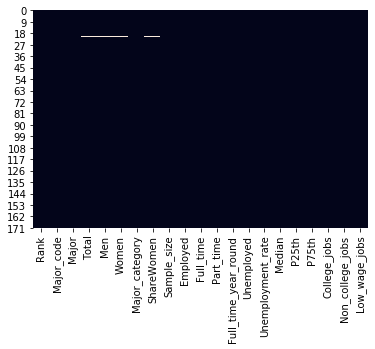

In [5]:
ax = sns.heatmap(jobs.isnull(), cbar = False)

plt.show()

- From above graphical representation, it seems that missing values are in one row. We can also counter check by using isnull function.

In [6]:
jobs[jobs["Total"].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [7]:
jobs.dropna(axis = "index", inplace = True)

In [8]:
jobs.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Dominant Major_category for Men and Women

In [9]:
len(jobs["Major_category"].unique())

16

In [10]:
dominant_major = jobs.groupby("Major_category")[["Men", "Women"]].mean()
dominant_major

,Men,Women
Major_category,,
Agriculture & Natural Resources,4484.111111,3918.111111
Arts,16798.750000,27842.500000
Biology & Life Science,13208.500000,19210.214286
Business,51373.230769,48809.538462
Communications & Journalism,32980.250000,65170.000000
Computers & Mathematics,18975.000000,8207.545455
Education,6470.375000,28475.187500
Engineering,14079.551724,4457.793103
Health,6293.083333,32309.416667


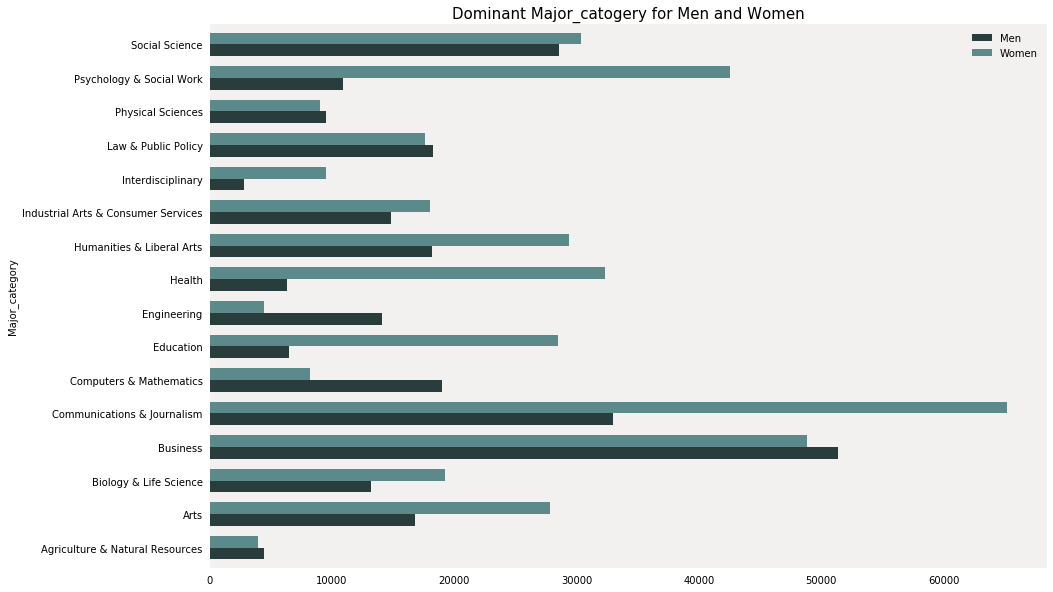

In [11]:
ax = dominant_major.plot.barh(figsize = (15,10), color = ["#293d3d", "#5c8a8a"] , width = 0.7)
ax.set_facecolor(color = "#F2F1F0")
ax.legend(frameon = False)
ax.set_title("Dominant Major_catogery for Men and Women", fontsize = 15)
ax.tick_params(bottom = False, left = False)
for value in ax.spines.values():
    value.set_visible(False)

plt.show()

In [12]:
def domain(row):
    men = row["Men"]
    women = row["Women"]
    if men > women:
        return "Men"
    else:
        return "Women"

In [13]:
dominant_major["Dominant_Gender"] = dominant_major.apply(domain, axis = 1)

In [14]:
dominant_major

,Men,Women,Dominant_Gender
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,Men
Arts,16798.750000,27842.500000,Women
Biology & Life Science,13208.500000,19210.214286,Women
Business,51373.230769,48809.538462,Men
Communications & Journalism,32980.250000,65170.000000,Women
Computers & Mathematics,18975.000000,8207.545455,Men
Education,6470.375000,28475.187500,Women
Engineering,14079.551724,4457.793103,Men
Health,6293.083333,32309.416667,Women


In [15]:
gender_group = dominant_major.groupby("Dominant_Gender")
gender_group

In [16]:
gender_group.groups

{'Men': Index(['Agriculture & Natural Resources', 'Business',
        'Computers & Mathematics', 'Engineering', 'Law & Public Policy',
        'Physical Sciences'],
       dtype='object', name='Major_category'),
 'Women': Index(['Arts', 'Biology & Life Science', 'Communications & Journalism',
        'Education', 'Health', 'Humanities & Liberal Arts',
        'Industrial Arts & Consumer Services', 'Interdisciplinary',
        'Psychology & Social Work', 'Social Science'],
       dtype='object', name='Major_category')}

In [17]:
men_df = gender_group.get_group("Men")
men_df

,Men,Women,Dominant_Gender
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,Men
Business,51373.230769,48809.538462,Men
Computers & Mathematics,18975.000000,8207.545455,Men
Engineering,14079.551724,4457.793103,Men
Law & Public Policy,18225.800000,17595.600000,Men
Physical Sciences,9539.000000,9008.900000,Men


In [18]:
women_df = gender_group.get_group("Women")
women_df

,Men,Women,Dominant_Gender
Major_category,,,
Arts,16798.750000,27842.500000,Women
Biology & Life Science,13208.500000,19210.214286,Women
Communications & Journalism,32980.250000,65170.000000,Women
Education,6470.375000,28475.187500,Women
Health,6293.083333,32309.416667,Women
Humanities & Liberal Arts,18189.733333,29374.800000,Women
Industrial Arts & Consumer Services,14825.857143,18001.571429,Women
Interdisciplinary,2817.000000,9479.000000,Women
Psychology & Social Work,10901.666667,42543.555556,Women


In [19]:
men_category = list(men_df.index)
men_category

['Agriculture & Natural Resources',
 'Business',
 'Computers & Mathematics',
 'Engineering',
 'Law & Public Policy',
 'Physical Sciences']

 - From the above analysis, there are 6 major_categories in which mens are more interested as compared to women. 

In [20]:
women_category = list(women_df.index)
women_category

['Arts',
 'Biology & Life Science',
 'Communications & Journalism',
 'Education',
 'Health',
 'Humanities & Liberal Arts',
 'Industrial Arts & Consumer Services',
 'Interdisciplinary',
 'Psychology & Social Work',
 'Social Science']

 - There are 10 major_categories among women in which the admission rate of women are more then men. 

## Top Majors in Dominant category according to the highest Employment

In [21]:
jobs.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [22]:
jobs["Major_category"].isin(men_category)

0       True
1       True
2       True
3       True
4       True
       ...  
168    False
169    False
170    False
171    False
172    False
Name: Major_category, Length: 172, dtype: bool

In [23]:
jobs["Major_category"].isin(women_category)

0      False
1      False
2      False
3      False
4      False
       ...  
168     True
169     True
170     True
171     True
172     True
Name: Major_category, Length: 172, dtype: bool

### Separate the two dataframes Men and Women according to the dominant Major_Categories

In [24]:
men_majors = jobs[jobs["Major_category"].isin(men_category)]
women_majors = jobs[jobs["Major_category"].isin(women_category)]

In [25]:
men_majors.shape

(77, 21)

In [26]:
women_majors.shape

(95, 21)

In [27]:
men_majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [28]:
m = men_majors["Major_category"].unique()
w = women_majors["Major_category"].unique()

In [29]:
pd.Series(sorted(m)).equals(pd.Series(men_category))

True

In [30]:
pd.Series(sorted(w)).equals(pd.Series(women_category))

True

 - Now, Men and Women dataframes are separated according to their dominant Major_categories and we counter check by using equals(). 

### Top Majors in Dominant category of Men according to the highest Employment

In [31]:
men_majors_emp = men_majors.sort_values(["Employed"], ascending = False)

In [32]:
men_majors_emp.groupby(["Major_category"])["Employed"].max()

Major_category
Agriculture & Natural Resources     17112
Business                           276234
Computers & Mathematics            102087
Engineering                         76442
Law & Public Policy                125393
Physical Sciences                   48535
Name: Employed, dtype: int64

In [33]:
emp_men_majors = men_majors_emp.groupby(["Major_category"])["Major","Employed","Median"].first()
emp_men_majors

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,ANIMAL SCIENCES,17112,30000
Business,BUSINESS MANAGEMENT AND ADMINISTRATION,276234,38000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,MECHANICAL ENGINEERING,76442,60000
Law & Public Policy,CRIMINAL JUSTICE AND FIRE PROTECTION,125393,35000
Physical Sciences,CHEMISTRY,48535,39000


In [34]:
col = ["Employed", "Median"]
narmalize_men = emp_men_majors.copy()
for i in col:
    narmalize_men[i] = narmalize_men[i]*100/narmalize_men[i].sum()

In [35]:
narmalize_men

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,ANIMAL SCIENCES,2.649724,11.764706
Business,BUSINESS MANAGEMENT AND ADMINISTRATION,42.773725,14.901961
Computers & Mathematics,COMPUTER SCIENCE,15.807762,20.784314
Engineering,MECHANICAL ENGINEERING,11.836737,23.529412
Law & Public Policy,CRIMINAL JUSTICE AND FIRE PROTECTION,19.416602,13.725490
Physical Sciences,CHEMISTRY,7.515450,15.294118


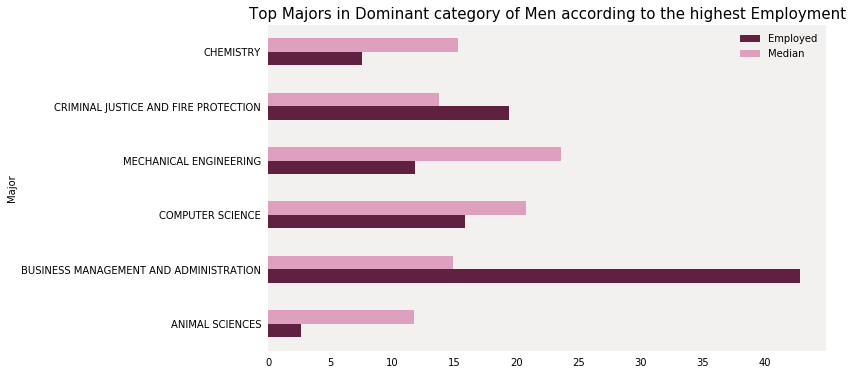

In [36]:
ax = narmalize_men.set_index("Major").plot.barh(figsize = (10,6), color = ["#602040", "#df9fbf"])
ax.set_facecolor(color = "#F2F1F0")
ax.legend(frameon = False)
ax.set_title("Top Majors in Dominant category of Men according to the highest Employment", fontsize = 15)
ax.tick_params(bottom = False, left = False)
for value in ax.spines.values():
    value.set_visible(False)

plt.show()

### Top Majors in Dominant category of Women according to the highest Employment

In [37]:
women_majors_emp = women_majors.sort_values("Employed", ascending = False)

In [38]:
women_majors_emp.groupby("Major_category")["Employed"].max()

Major_category
Arts                                    83483
Biology & Life Science                 182295
Communications & Journalism            179633
Education                              149339
Health                                 180903
Humanities & Liberal Arts              149180
Industrial Arts & Consumer Services    103078
Interdisciplinary                        9821
Psychology & Social Work               307933
Social Science                         133454
Name: Employed, dtype: int64

In [39]:
emp_women_majors = women_majors_emp.groupby("Major_category")[["Major", "Employed", "Median"]].first()
emp_women_majors

,Major,Employed,Median
Major_category,,,
Arts,COMMERCIAL ART AND GRAPHIC DESIGN,83483,35000
Biology & Life Science,BIOLOGY,182295,33400
Communications & Journalism,COMMUNICATIONS,179633,35000
Education,ELEMENTARY EDUCATION,149339,32000
Health,NURSING,180903,48000
Humanities & Liberal Arts,ENGLISH LANGUAGE AND LITERATURE,149180,32000
Industrial Arts & Consumer Services,PHYSICAL FITNESS PARKS RECREATION AND LEISURE,103078,32000
Interdisciplinary,MULTI/INTERDISCIPLINARY STUDIES,9821,35000
Psychology & Social Work,PSYCHOLOGY,307933,31500


In [40]:
col2 = ["Employed", "Median"]
normalize_women = emp_women_majors.copy()

for w in col2:
    normalize_women[w] = normalize_women[w]*100 / normalize_women[w].sum()

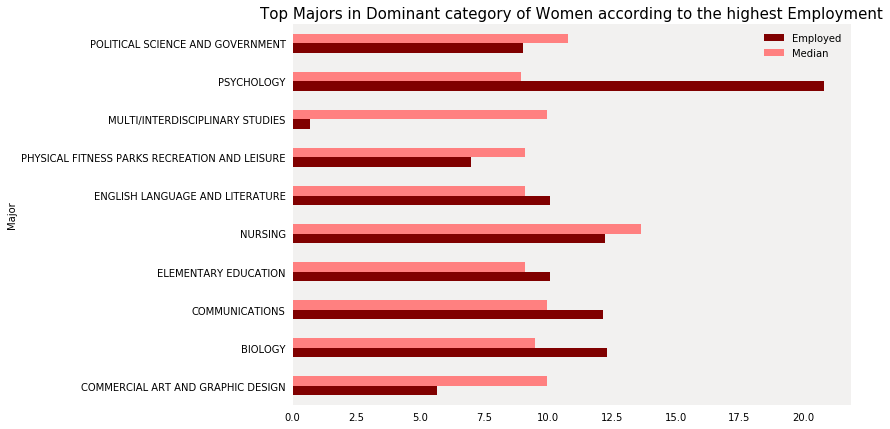

In [41]:
ax = normalize_women.set_index("Major").plot.barh(figsize = (10,7), color = ["#800000", "#ff8080"])
ax.set_facecolor(color = "#F2F1F0")
ax.legend(frameon = False)
ax.set_title("Top Majors in Dominant category of Women according to the highest Employment", fontsize = 15)
ax.tick_params(bottom = False, left = False)
for value in ax.spines.values():
    value.set_visible(False)

plt.show()

## Top Majors in Dominant category according to highest Median Salary

In [42]:
sal_men_majors = men_majors.sort_values("Median", ascending = False)

In [43]:
men_majors_sal = sal_men_majors.groupby("Major_category")[["Major", "Employed", "Median"]].first()

In [44]:
col3 = ["Employed", "Median"]
normalize_men_sal = men_majors_sal.copy()

for m in col3:
    normalize_men_sal[m] = normalize_men_sal[m]*100 / normalize_men_sal[m].sum()

In [45]:
normalize_men_sal

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,GENERAL AGRICULTURE,7.508769,10.498688
Business,ACTUARIAL SCIENCE,2.461226,16.272966
Computers & Mathematics,COMPUTER SCIENCE,86.284072,13.910761
Engineering,PETROLEUM ENGINEERING,1.670118,28.871391
Law & Public Policy,COURT REPORTING,0.786037,14.173228
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1.289777,16.272966


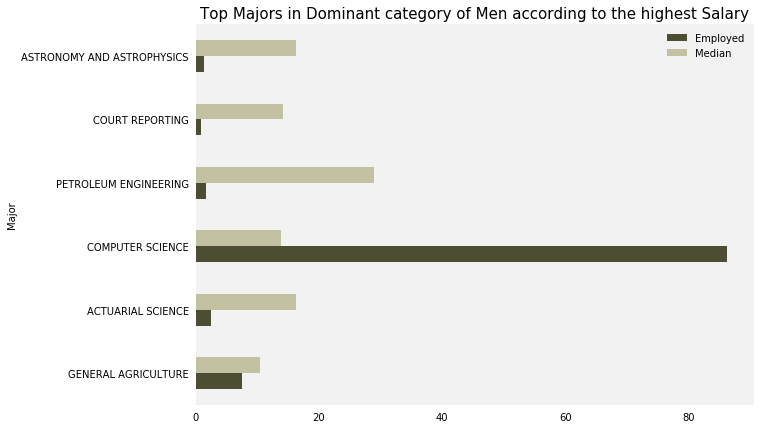

In [55]:
ax = normalize_men_sal.set_index("Major").plot.barh(figsize = (10,7), color = ["#4d4d33", "#c2c2a3"])
ax.set_facecolor(color = "#f2f2f2")
ax.legend(frameon = False)
ax.set_title("Top Majors in Dominant category of Men according to the highest Salary", fontsize = 15)
ax.tick_params(bottom = False, left = False)
for value in ax.spines.values():
    value.set_visible(False)

plt.show()

### Top Majors in Dominant category of Women according to the highest Salary

In [47]:
sal_women_majors = women_majors.sort_values("Median", ascending = False)

In [48]:
women_majors_sal = sal_women_majors.groupby("Major_category")[["Major", "Employed", "Median"]].first()

In [49]:
col4 = ["Employed", "Median"]
normalize_women_sal = women_majors_sal.copy()

for w in col4:
    normalize_women_sal[w] = normalize_women_sal[w]*100 / normalize_women_sal[w].sum()

In [50]:
normalize_women_sal

,Major,Employed,Median
Major_category,,,
Arts,MISCELLANEOUS FINE ARTS,0.795299,11.600928
Biology & Life Science,PHARMACOLOGY,0.312225,10.440835
Communications & Journalism,ADVERTISING AND PUBLIC RELATIONS,12.370532,8.120650
Education,SCHOOL STUDENT COUNSELING,0.199234,9.512761
Health,NURSING,49.372685,11.136891
Humanities & Liberal Arts,UNITED STATES HISTORY,0.760638,9.280742
Industrial Arts & Consumer Services,CONSTRUCTION SERVICES,4.453566,11.600928
Interdisciplinary,MULTI/INTERDISCIPLINARY STUDIES,2.680382,8.120650
Psychology & Social Work,INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY,0.639460,9.280742


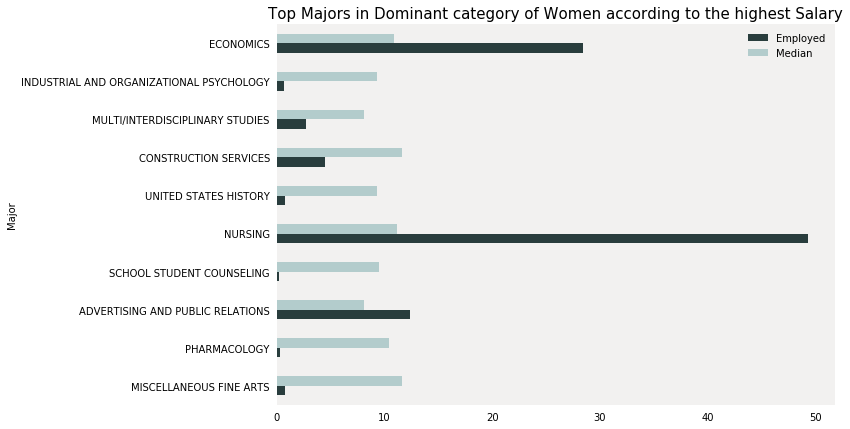

In [58]:
ax = normalize_women_sal.set_index("Major").plot.barh(figsize = (10,7), color = ["#293d3d", "#b3cccc"])
ax.set_facecolor(color = "#F2F1F0")
ax.legend(frameon = False)
ax.set_title("Top Majors in Dominant category of Women according to the highest Salary", fontsize = 15)
ax.tick_params(bottom = False, left = False)
for value in ax.spines.values():
    value.set_visible(False)

plt.show()